# <font color='orange'>Import Packages</font>

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, log_loss, jaccard_similarity_score
from  sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
%matplotlib inline

# filter warnings

In [2]:
warnings.filterwarnings("ignore")

# Read CSV data

In [3]:
data = pd.read_csv("loan_payments_data.csv")

# first five rows

In [4]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# <font color = "orange">Check missing values</font>

In [5]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

# percent of missing "paid_off_time"

In [6]:
print('Percent of missing "paid_off_time" records is %.2f%%' %((data['paid_off_time'].isnull().sum()/data.shape[0])*100))

Percent of missing "paid_off_time" records is 20.00%


# percent of missing "past_due_days"

In [7]:
print('Percent of missing "past_due_days" records is %.2f%%' %((data['past_due_days'].isnull().sum()/data.shape[0])*100))

Percent of missing "past_due_days" records is 60.00%


# unique 'principal' list

In [8]:
data['Principal'].unique()

array([1000,  300,  800,  900,  700,  500], dtype=int64)

# unique 'loan_status' list

In [9]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

# Preview data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


# <font color="orange">'loan status'</font> types as percentage in a graph view

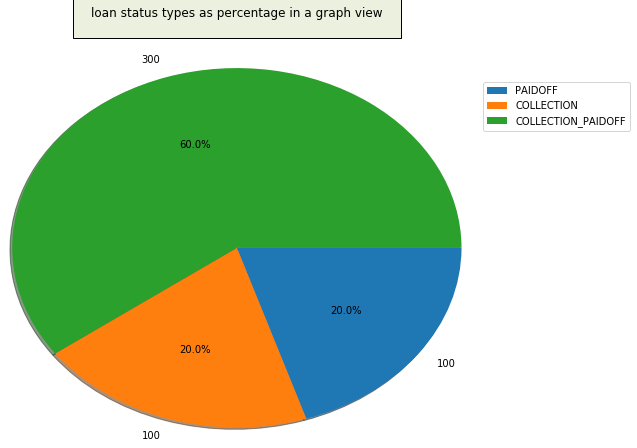

In [11]:
data_preview = data.copy()
label_unique = data['loan_status'].unique()
label_occurance_count = data_preview.groupby('loan_status').size()
plt.pie(label_occurance_count, labels = label_occurance_count,counterclock=False, shadow=True, radius = 2, autopct='%1.1f%%', labeldistance = 1.1)
plt.title('loan status types as percentage in a graph view', y=1.5, bbox={'facecolor':'#EBF1DE', 'pad':18})
plt.legend(label_unique,loc="top right", bbox_to_anchor=(1.36,1.26))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show()

# dataset use

In [12]:
new_data = data.copy()

# <font color = "red">preprocessing by using Encoder on label</font>

In [13]:
le=preprocessing.LabelEncoder()
data['loan_status']=le.fit_transform(data['loan_status'])
data['Gender']=le.fit_transform(data['Gender'])
data['education']=le.fit_transform(data['education'])
data['past_due_days']=le.fit_transform(data['past_due_days'])

# first five rows view after transformation

In [14]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,2,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


# <font color = "orange">data information after transformation</font>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null int64
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     500 non-null int64
age               500 non-null int64
education         500 non-null int64
Gender            500 non-null int64
dtypes: int64(7), object(4)
memory usage: 43.0+ KB


# new_data group by 'loan_status' and count 'loan_status' by gender

In [16]:
new_data.groupby('loan_status')['Gender'].agg(['count'])

,count
loan_status,
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


# a bar graph by "Gender" and "loan_status" with "education" as hue

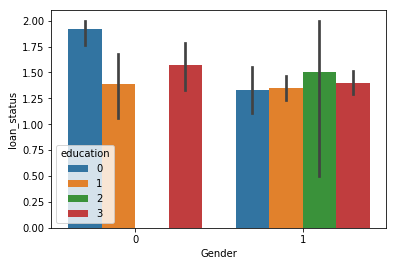

In [17]:
sns.barplot(x="Gender", y="loan_status", hue="education", data=data);

# unique values of 'past_due_days'

In [18]:
data['past_due_days'].unique()

array([ 83, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162,
       161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 174, 175, 176, 177, 205, 204, 203, 202, 201, 200, 199,
       198, 197, 196, 195, 194, 193, 206, 192, 190, 189, 188, 187, 186,
       185, 184, 183, 182, 181, 180, 179, 178, 146, 145, 144, 113, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,
        97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
       112, 114, 143, 115, 142, 141, 140, 139, 138, 137, 136, 135, 134,
       133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121,
       120, 119, 118, 117, 116, 191, 208, 316, 209, 298, 297, 296, 295,
       294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282,
       281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 299, 300, 301,
       302, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319,
       318, 331, 317, 315, 314, 313, 312, 311, 310, 309, 308, 30

# likely to keep due days

In [19]:
x=data.groupby('Gender')['past_due_days'].agg(['sum'])
x=pd.DataFrame(x)
x

,sum
Gender,
0,9677
1,48332


# a bar graph by "Gender" and "loan_status"

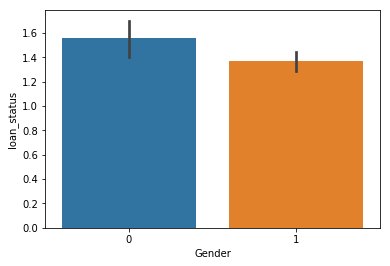

In [20]:
sns.barplot(x='Gender',y='loan_status',data=data)

# a bar graph by "age" and "loan_status"

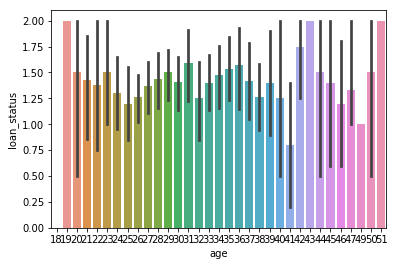

In [21]:
sns.barplot(x='age',y='loan_status',data=data)

# a factor graph by "age" and "loan_status"

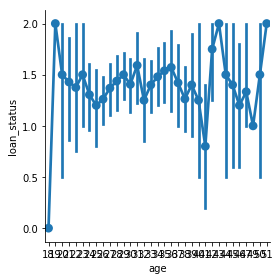

In [22]:
sns.factorplot(x='age',y='loan_status',data=data)

# a bar graph by "education" and "loan_status"

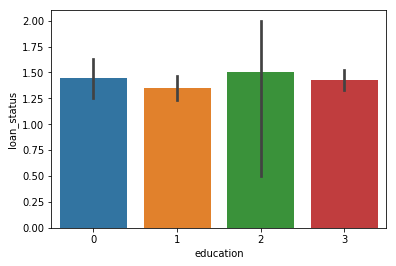

In [23]:
sns.barplot(x='education',y='loan_status',data=data)

# a count graph by "Gender"

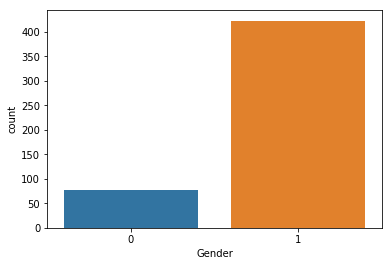

In [24]:
sns.countplot(x='Gender',data=data)

# use of dataset- data

In [25]:
processed_analysis_data=data

# <font color = "green">select 'loan_status' as label or y value</font>

In [26]:
label = processed_analysis_data.pop('loan_status')

# <font color='red'>DATA CLEANING</font> by drop of column name- 'Loan_ID', 'effective_date', 'due_date', 'paid_off_time' <font color='orange'>from processed_analysis_data dataset</font>

In [27]:
processed_analysis_data.drop('Loan_ID', axis=1, inplace=True)
processed_analysis_data.drop('effective_date', axis=1, inplace=True)
processed_analysis_data.drop('due_date', axis=1, inplace=True)
processed_analysis_data.drop('paid_off_time', axis=1, inplace=True)

# first five rows view of processed_analysis_data

In [28]:
processed_analysis_data.head(5)

,Principal,terms,past_due_days,age,education,Gender
0,1000,30,83,45,1,1
1,1000,30,173,50,0,0
2,1000,30,172,33,0,0
3,1000,15,171,27,3,1
4,1000,30,170,28,3,0


# <font color = "light-blue">Train-Test split processed_analysis_data as 80% train data and 20% test data</font>

In [29]:
data_train, data_test, label_train, label_test = train_test_split(processed_analysis_data, label, test_size = 0.2, random_state = 42)

# a classifiers dictionary

In [30]:
classifiers={
    "K_Neighbors_Classifier": KNeighborsClassifier(), 
    "Decision_Tree_Classifier": DecisionTreeClassifier(random_state = 42),
    "support_vector_machine": svm.LinearSVC(random_state = 42), 
    "Logistic_Regression": LogisticRegression(random_state = 42)
            }

# <font color = "orange">use for loop to enumerate classifiers items</font>

In [31]:
metrics = pd.DataFrame(index = 
      ['jaccard', 'f1_score', 'log_loss', 'accuracy', 'cross_val'], 
                       columns = 
     ["K_Neighbors_Classifier", "Decision_Tree_Classifier", "support_vector_machine", "Logistic_Regression"])

for i, (clf_name, clf) in enumerate(classifiers.items()):

    if clf_name == "K_Neighbors_Classifier":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    elif clf_name == "Decision_Tree_Classifier":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    elif clf_name == "support_vector_machine":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    else: 
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
    
    n_errors = (y_pred != label_test).sum()

    print("\n\n\n")
    
    # error in prediction
    print('{} {} {}: {}'.format("error in " ,clf_name, "prediction", n_errors))
    
    print("\n\n")
    
    # accuracy score in prediction
    print("accuracy score in prediction: ")
    print(accuracy_score(label_test, y_pred))
    
    
    # model accuracy
    print("model accuracy: ")
    print(clf.score(data_test, label_test))
    
    
    # cross validation score
    print("cross validation score: ")
    cross_val = cross_val_score(clf, processed_analysis_data, label, scoring='accuracy', cv=10)
    print(cross_val)
    print("cross_validation_score.mean(): ")
    print(cross_val.mean())
    
    print("\n\n")
    
    # confusion_matrix
    print("confusion matrix: ")
    print(confusion_matrix(label_test, y_pred))
    
    print("\n\n")
    
    print("f1_score by average as macro : {}".format(f1_score(label_test, y_pred, average='macro')))

    print("f1_score by average as micro : {}".format(f1_score(label_test, y_pred, average='micro')))

    print("f1_score by average as weighted : {}".format(f1_score(label_test, y_pred, average='weighted')))

    print("f1_score by average as None : {}".format(f1_score(label_test, y_pred, average=None)))

    print("\n\n")
    
    print("jaccard similarity score 1 : {}".format(jaccard_similarity_score(label_test, y_pred)))

    print("jaccard similarity score 2 : {}".format(jaccard_similarity_score(label_test, y_pred, normalize=False)))
    
    print("\n\n")
        
    if(clf_name == "support_vector_machine"):
        pred = clf.decision_function(data_test)
        
    else: 
        pred = clf.predict_proba(data_test)
        
    print("log loss : {}".format(log_loss(label_test, pred)))
    
    print("\n\n")
    
    print("precision score with average value as micro: {}".format(precision_score(label_test, y_pred, average="micro")))
    print("precision score with average value as macro: {}".format(precision_score(label_test, y_pred, average="macro")))
    print("precision score with average value as weighted: {}".format(precision_score(label_test, y_pred, average="weighted")))
    
    print("\n\n")
    
    print("recall score with average value as micro: {}".format(recall_score(label_test, y_pred, average="micro")))
    print("recall score with average value as macro: {}".format(recall_score(label_test, y_pred, average="macro")))
    print("recall score with average value as weighted: {}".format(recall_score(label_test, y_pred, average="weighted")))
    
    print("\n\n")
    
    # classification report
    print("classification report: ")
    print(classification_report(label_test, y_pred)) 
    
    print("\n\n\n")
    
    print(clf_name + " classifier section end. ")
    print("\n\n--------------------------------------------------------- \n\n")
    print("\n \n")
      
    metrics.loc['jaccard', clf_name] = jaccard_similarity_score(label_test, y_pred)
    metrics.loc['f1_score', clf_name] = f1_score(label_test, y_pred, average=None).mean()
    metrics.loc['log_loss', clf_name] = log_loss(label_test, pred)
    metrics.loc['accuracy', clf_name] = accuracy_score(label_test, y_pred)
    metrics.loc['cross_val', clf_name] = cross_val_score(clf, processed_analysis_data, label, scoring='accuracy', cv=10).mean()
    
   





error in  K_Neighbors_Classifier prediction: 3



accuracy score in prediction: 
0.97
model accuracy: 
0.97
cross validation score: 
[0.98 1.   0.98 1.   0.96 0.98 0.98 0.96 0.72 0.92]
cross_validation_score.mean(): 
0.9480000000000001



confusion matrix: 
[[24  0  0]
 [ 3 21  0]
 [ 0  0 52]]



f1_score by average as macro : 0.9581699346405229
f1_score by average as micro : 0.97
f1_score by average as weighted : 0.9698823529411764
f1_score by average as None : [0.94117647 0.93333333 1.        ]



jaccard similarity score 1 : 0.97
jaccard similarity score 2 : 97



log loss : 0.39425017594636375



precision score with average value as micro: 0.97
precision score with average value as macro: 0.9629629629629629
precision score with average value as weighted: 0.9733333333333333



recall score with average value as micro: 0.97
recall score with average value as macro: 0.9583333333333334
recall score with average value as weighted: 0.97



classification report: 
             precis

# <font color="dark-yellow">metrics in percentage</font>

In [32]:
metrics_in_percentage = 100*metrics 
metrics_in_percentage

,K_Neighbors_Classifier,Decision_Tree_Classifier,support_vector_machine,Logistic_Regression
jaccard,97,97,92,97
f1_score,95.817,95.817,89.2234,96.1924
log_loss,39.425,103.616,143.605,17.9523
accuracy,97,97,92,97
cross_val,94.8,97.8,87.2,95.4


# <font color="orange">Kaggle Project- </font> <font color="red">data analysis</font> <font color = "green">on loan application dataset</font> <font color="black">shown in</font> <font color="purple">graph view</font>

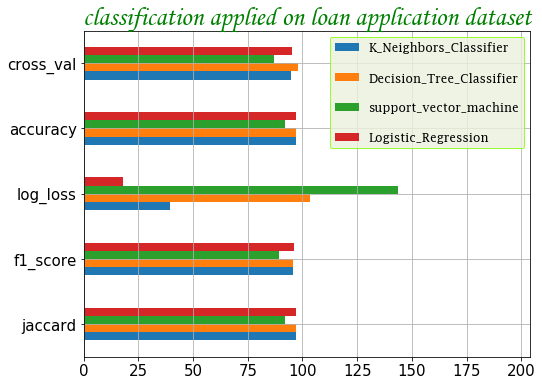

In [33]:
metrics = metrics.convert_objects(convert_numeric=True)   

metrics_in_percentage = (100*metrics)
font = font_manager.FontProperties(family='Lucida Fax', size=12)
#rcParams['font.family'] = 'Britannic Bold'
fig, ax = plt.subplots(figsize = (8, 6)) 
metrics_in_percentage.plot(kind = 'barh', ax = ax, fontsize = 15) 
#plt.rcParams["font.family"] = "Monotype Corsiva"

title_font = {'fontname':'Monotype Corsiva'}
#legend_font = {'fontname':'Impact'}

plt.title(s = "classification applied on loan application dataset", color = "green", fontsize = 26, loc = "center", fontweight = "bold", **title_font)
legend = ax.legend()


legend = ax.legend(loc = "upper right", labelspacing=1.5, prop=font)
legend
frame = legend.get_frame()
frame.set_facecolor("#EBF1DE")
frame.set_edgecolor('chartreuse')
ax.margins(0.42)
plt.savefig('classification_on_loan_application_dataset.png')
ax.grid()